<a href="https://colab.research.google.com/github/vidulaarumugam/Vidula_zeotap/blob/master/Vidula_N_A_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA


customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge the two datasets on CustomerID
data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Feature engineering

customer_features = data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    transaction_count=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()


customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_spend', 'transaction_count', 'avg_transaction_value']])

# Prepare the final dataset for clustering
final_data = pd.DataFrame(scaled_features, columns=['total_spend', 'transaction_count', 'avg_transaction_value'])
final_data['Region'] = customer_features['Region']

# Display first few rows
final_data.head()


,total_spend,transaction_count,avg_transaction_value,Region
0,-0.061701,-0.011458,-0.070263,South America
1,-0.877744,-0.467494,-0.934933,Asia
2,-0.405857,-0.467494,-0.026271,South America
3,1.032547,1.356650,-0.076769,South America
4,-0.783929,-0.923530,-0.040028,Asia


In [11]:
# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(final_data[['total_spend', 'transaction_count', 'avg_transaction_value']])

# Add cluster labels to the final_data
final_data['Cluster'] = kmeans.labels_


final_data.head()


,total_spend,transaction_count,avg_transaction_value,Region,Cluster,PCA1,PCA2
0,-0.061701,-0.011458,-0.070263,South America,3,-0.078946,-0.050559
1,-0.877744,-0.467494,-0.934933,Asia,1,-1.273037,-0.492051
2,-0.405857,-0.467494,-0.026271,South America,3,-0.567253,0.249271
3,1.032547,1.356650,-0.076769,South America,0,1.481057,-0.847656
4,-0.783929,-0.923530,-0.040028,Asia,1,-1.103176,0.502019


In [9]:
# Calculate Davies-Bouldin Index (DBI)
db_index = davies_bouldin_score(final_data[['total_spend', 'transaction_count', 'avg_transaction_value']], final_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')


Davies-Bouldin Index: 0.9089


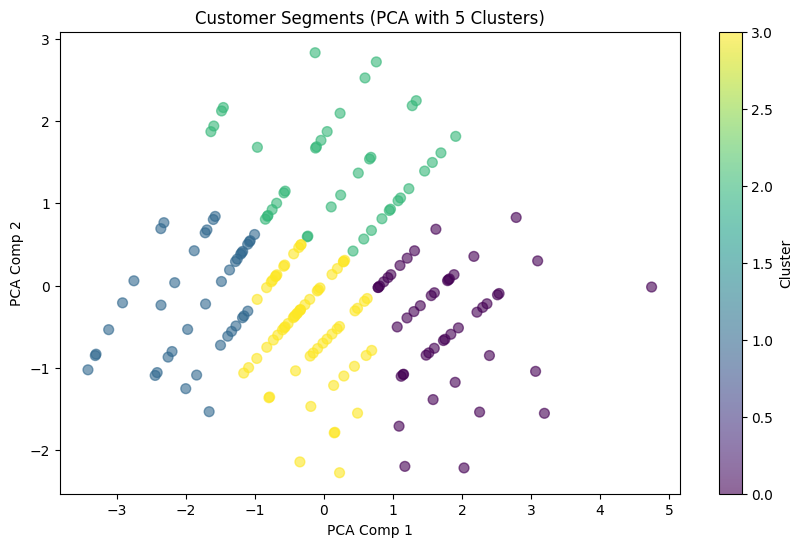

In [12]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(final_data[['total_spend', 'transaction_count', 'avg_transaction_value']])


final_data['PCA1'] = pca_components[:, 0]
final_data['PCA2'] = pca_components[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(final_data['PCA1'], final_data['PCA2'], c=final_data['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Customer Segments (PCA with 5 Clusters)')
plt.xlabel('PCA Comp 1')
plt.ylabel('PCA Comp 2')
plt.colorbar(label='Cluster')
plt.show()
